# Churn Rate Calculation 

## Overview

This script calculates the churn rate based on a given dataset. Churn rate is a crucial business metric that measures the percentage of customers who stop using a product or service within a specified time period. It is commonly used to assess customer retention and satisfaction.

## Churn Rate Definition

Churn rate is calculated using the following formula:

$$
\text{Churn Rate} = \frac{\text{Number of Clients at the Beginning} - \text{Number of Clients at the End}}{\text{Number of Clients at the Beginning}}
$$


Where:
- **Number of Clients at the Beginning:** The count of clients who were active at the start of the specified period (e.g., beginning of the year).
- **Number of Clients at the End:** The count of clients who are still present or active at the end of the specified period (e.g., end of the year).



## Script Explanation

This script extracts relevant data from a dataset, identifies users present in January and December of each year, and calculates the yearly churn rate. Users who were active in January but are not present in December are considered churned for that year. The churn rates are then visualized using bar charts to compare yearly changes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import random

In [2]:
df = pd.read_csv('prepared_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143869 entries, 0 to 143868
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      143869 non-null  int64  
 1   account_id      143869 non-null  int64  
 2   payment_amount  143869 non-null  float64
 3   payment_method  143869 non-null  object 
 4   payment_date    143869 non-null  object 
 5   gender          143869 non-null  object 
 6   age             143869 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 7.7+ MB


In [3]:
df['payment_date'] = pd.to_datetime(df['payment_date'])

In [4]:
# Extracting year and month from 'payment_date' column and storing in separate columns
df['year'] = df['payment_date'].dt.year
df['month'] = df['payment_date'].dt.month

# Identifing users present in January and December of each year
january_users = df[df['month'] == 1]
december_users = df[df['month'] == 12]

In [5]:
churn_rates = {}
# Data includes date between 2016 and 2023, as 2023 December is not included the  churn rate will be calculated until 2022 December 
for year in range(2016, 2023):
    # Filtering users in each year for January and December separately
    january_users_year = january_users[january_users['year'] == year]
    december_users_year = december_users[december_users['year'] == year]

    # Findng users present in January but not in December
    churned_users = january_users_year[~january_users_year['account_id'].isin(december_users_year['account_id'])]

    churn_rate = len(churned_users) / len(january_users_year)

    churn_rates[year] = churn_rate

In [6]:
print('\tYearly churn rates')
for year, churn_rate in churn_rates.items():
    print(f'Churn rate for {year}: {churn_rate:.2%}')

	Yearly churn rates
Churn rate for 2016: 19.85%
Churn rate for 2017: 20.03%
Churn rate for 2018: 17.14%
Churn rate for 2019: 11.66%
Churn rate for 2020: 15.80%
Churn rate for 2021: 13.67%
Churn rate for 2022: 14.97%


## Interpretation of Churn Rate Results

The churn rates for each year represent the percentage of customers who stopped using the service during the respective years. Here's an interpretation of the given churn rates:

1. **Churn rate for 2016: 19.85%**
   - Approximately 19.85% of customers who were using the service in January 2016 did not continue to use it by the end of the year.

2. **Churn rate for 2017: 20.03%**
   - About 20.03% of customers who were active in January 2017 did not continue their usage throughout the year.

3. **Churn rate for 2018: 17.14%**
   - Around 17.14% of customers who started the year 2018 did not remain as users until the end of the year.

4. **Churn rate for 2019: 11.66%**
   - The churn rate for 2019 is lower, indicating that only 11.66% of customers who started the year ceased using the service.

5. **Churn rate for 2020: 15.80%**
   - In 2020, approximately 15.80% of customers discontinued their usage during the year.

6. **Churn rate for 2021: 13.67%**
   - About 13.67% of customers who were active in January 2021 did not continue using the service by the end of the year.

7. **Churn rate for 2022: 14.97%**
   - In 2022, around 14.97% of customers stopped using the service during the year.

These churn rates provide insights into customer retention over the specified years. A higher churn rate indicates a larger proportion of customers discontinuing their usage, while a lower churn rate suggests better customer retention. It's important to analyze these rates in the context of business goals and industry benchmarks to understand their significance. 

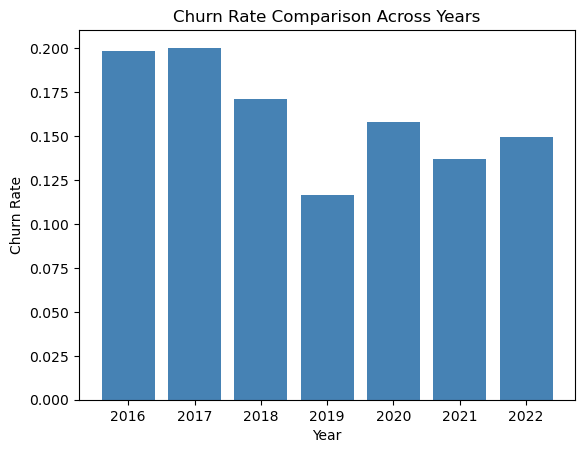

In [7]:
years = list(churn_rates.keys())
churn_rates_values = list(churn_rates.values())

plt.bar(years, churn_rates_values, color='steelblue')
plt.xlabel('Year')
plt.ylabel('Churn Rate')
plt.title('Churn Rate Comparison Across Years')
plt.show()

In [8]:
# Uncomment below code to visualize line chart of yearly churn rates
# plt.plot(years, churn_rates_values, marker='o', linestyle='-')
# plt.xlabel('Year')
# plt.ylabel('Churn Rate')
# plt.title('Churn Rate Trend Over Years')
# plt.show()

## Calculating churn rate for each gender by year


In [9]:
churn_rates_gender = {}
for year in range(2016, 2023):
    january_users_year = january_users[january_users['year'] == year]
    december_users_year = december_users[december_users['year'] == year]

    january_users_year_male = january_users_year[january_users_year['gender'] == "male"]
    january_users_year_female = january_users_year[january_users_year['gender'] == "female"]

    december_users_year_male = december_users_year[december_users_year['gender'] == "male"]
    december_users_year_female = december_users_year[december_users_year['gender'] == "female"]

    # Findng male and feamle users present in January but not in December separately
    churned_users_male = january_users_year_male[~january_users_year_male['account_id'].isin(december_users_year_male['account_id'])]
    churned_users_female = january_users_year_female[~january_users_year_female['account_id'].isin(december_users_year_female['account_id'])]

    churn_rate_m = len(churned_users_male) / len(january_users_year)
    churn_rate_f = len(churned_users_female) / len(january_users_year)

    churn_rates_gender[year] = {}
    churn_rates_gender[year]['male'] = churn_rate_m
    churn_rates_gender[year]['female'] = churn_rate_f


In [10]:
print('\tYearly churn rates for male and female separately')
for year, churn_rates_gender_info in churn_rates_gender.items():
    print(f'Churn rate in {year}: ')
    for gender, churn_rate in churn_rates_gender_info.items():
        print(f'\t\t{gender}: {churn_rate:.2%}')

	Yearly churn rates for male and female separately
Churn rate in 2016: 
		male: 8.33%
		female: 11.52%
Churn rate in 2017: 
		male: 9.33%
		female: 10.70%
Churn rate in 2018: 
		male: 10.60%
		female: 6.54%
Churn rate in 2019: 
		male: 6.81%
		female: 4.85%
Churn rate in 2020: 
		male: 8.29%
		female: 7.50%
Churn rate in 2021: 
		male: 8.06%
		female: 5.62%
Churn rate in 2022: 
		male: 8.84%
		female: 6.13%


The churn rates represent the percentage of customers who stopped using a service in each respective year, categorized by gender. Let's interpret the churn rates for each year:

1. **Churn Rate in 2016:**

   -Male: 8.33%
   
   -Female: 11.52%

   - In 2016, the churn rate for female customers was higher (11.52%) compared to male customers (8.33%). This suggests a relatively higher proportion of female customers discontinued their use of the service during that year.

2. **Churn Rate in 2017:**

   -Male: 9.33%

   -Female: 10.70%

   - The churn rates in 2017 show a slightly higher churn rate for female customers (10.70%) compared to male customers (9.33%). Both genders experienced a moderate level of churn

3. **Churn Rate in 2018:**

   -Male: 10.60%
   
   -Female: 6.54%

   - Compared to last years results, the churn rate for male customers increased to 10.60%, while the churn rate for female customers decreased to 6.54%. This indicates a higher churn rate among male customers in 2018.

4. **Churn Rate in 2019:**

   -Male: 6.81%
   
   -Female: 4.85%

   - The churn rates in 2019 decreased for both male and female customers compared to last year, with male customers having a slightly higher churn rate (6.81%) compared to female customers (4.85%).

5. **Churn Rate in 2020:**

   -Male: 8.29%
   
   -Female: 7.50%

   - Both male and female customers experienced a moderate churn rate, with male customers having a slightly higher rate (8.29%) than female customers (7.50%). 

6. **Churn Rate in 2021:**

   -Male: 8.06%
   
   -Female: 5.62%

   - The churn rates in 2021 continued to show a higher churn rate for male customers (8.06%) compared to female customers (5.62%). The curn rate for female customers decrease compare to last years result.

7. **Churn Rate in 2022:**

   -Male: 8.84%
   
   -Female: 6.13%

   - Similar to previous 4 years, male customers had a higher churn rate (8.84%) compared to female customers (6.13%)


## Line chart of Churn Rates Over Years by Gender

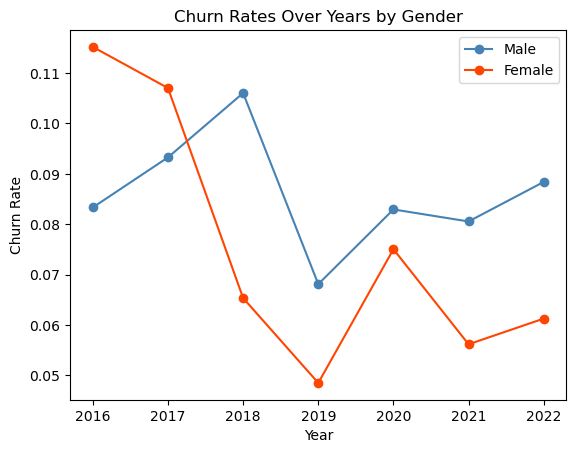

In [11]:
years = list(churn_rates_gender.keys())
male_churn_rates = [churn_rates_gender[year]['male'] for year in years]
female_churn_rates = [churn_rates_gender[year]['female'] for year in years]

plt.plot(years, male_churn_rates, label='Male', marker='o', color='steelblue')
plt.plot(years, female_churn_rates, label='Female', marker='o', color='#FF4500')

plt.xlabel('Year')
plt.ylabel('Churn Rate')
plt.title('Churn Rates Over Years by Gender')
plt.legend()
plt.show()

The graph shows that the churn rate for female was higher than for male in 2016 and 2017, which means that amonge the users that stoped using our service the majority were female. However, the situation changes after 2017. The churn rate for male is higher than for female, so most users stoping to use the service are male. 

This can help us to examine and find the reason for this difference and take actions to deduce this number.

## Calculating Gender-Specific Churn Rates

The provided code calculates churn rates for male and female users separately over multiple years. The script identifies users present in January and December of each year, then computes the churn rate for each gender during each year.

### Why Gender-Specific Churn Rates?

Analyzing gender-specific churn rates can provide valuable insights into user retention patterns, helping businesses tailor their strategies based on demographic differences. Understanding whether there are notable variations in churn rates between male and female users can inform targeted marketing efforts, product enhancements, or customer support initiatives.


This analysis can contribute to a more nuanced understanding of customer behavior, allowing businesses to implement targeted strategies aimed at improving customer retention.


In [12]:
churn_rates = {'male': {}, 'female': {}}

for gender in ['male', 'female']:
    january_users_gender = january_users[january_users['gender'] == gender]
    december_users_gender = december_users[december_users['gender'] == gender]

    for year in range(2016, 2023):
        # Filtering users for each year, gender, and month
        january_users_year = january_users_gender[january_users_gender['year'] == year]
        december_users_year = december_users_gender[december_users_gender['year'] == year]

        # Finding users present in January but not in December
        churned_users = january_users_year[~january_users_year['account_id'].isin(december_users_year['account_id'])]

        churn_rate = len(churned_users) / len(january_users_year)

        churn_rates[gender][year] = churn_rate

print('The churn rates for each year for male and female separately')
print("Churn Rates:")
for gender, rates in churn_rates.items():
    print(f"{gender.capitalize()}:")
    for year, rate in rates.items():
        print(f"  Year {year}: {rate:.2%}")

The churn rates for each year for male and female separately
Churn Rates:
Male:
  Year 2016: 17.09%
  Year 2017: 18.89%
  Year 2018: 20.92%
  Year 2019: 13.39%
  Year 2020: 16.36%
  Year 2021: 15.64%
  Year 2022: 17.12%
Female:
  Year 2016: 22.49%
  Year 2017: 21.15%
  Year 2018: 13.25%
  Year 2019: 9.87%
  Year 2020: 15.22%
  Year 2021: 11.58%
  Year 2022: 12.67%


### Male Churn Rate:
- **Year 2022:** 17.12%

### Female Churn Rate:
- **Year 2022:** 12.67%

These churn rates represent the percentage of male and female users who stopped using the service in the year 2022. The male churn rate is 17.12%, while the female churn rate is 12.67%. Analyzing gender-specific churn rates can offer insights into potential differences in user retention patterns, enabling targeted strategies for customer engagement and retention.


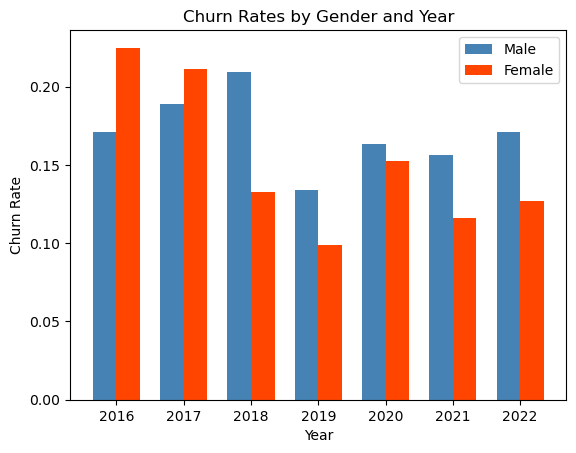

In [13]:
years = list(range(2016, 2023))
male_churn_rates = [churn_rates['male'].get(year, 0) for year in years]
female_churn_rates = [churn_rates['female'].get(year, 0) for year in years]

# Plotting the bar graph with two separate bars for each year
bar_width = 0.35 
index = np.arange(len(years))

plt.bar(index - bar_width/2, male_churn_rates, width=bar_width, color='steelblue', label='Male')
plt.bar(index + bar_width/2, female_churn_rates, width=bar_width, color='#FF4500', label='Female')
plt.xlabel('Year')
plt.ylabel('Churn Rate')
plt.title('Churn Rates by Gender and Year')
plt.legend()
plt.xticks(index, years)

plt.show()



## Calculating Overall Churn Rate between 2016 and 2023

In [14]:
january_users_2016 = january_users[january_users['year'] == 2016]
january_users_2023 = january_users[january_users['year'] == 2023]

churned_users_2016_to_2023 = january_users_2016[~january_users_2016['account_id'].isin(january_users_2023['account_id'])]

churn_rate_2016_to_2023 = len(churned_users_2016_to_2023) / len(january_users_2016)

print(f'Churn Rate from 2016 January to 2023 January: {churn_rate_2016_to_2023:.2%}')

Churn Rate from 2016 January to 2023 January: 59.31%


The churn rate from January 2016 to January 2023 is 59.31%. This percentage represents the proportion of customers who stopped using the service during this time period.